In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.sparse as sps
import pandas as pd
import scipy as sc

%matplotlib inline
plt.rcParams['figure.figsize'] = 6, 4

In [3]:
size = 10000
np.random.seed(seed=10)
X_seed = np.random.normal(0, 1, size)
X0 = X_seed + np.random.normal(0, .1, size)
X1 = X_seed + np.random.normal(0, .1, size)
X2 = X_seed + np.random.normal(0, .1, size)
X = np.array([X0, X1, X2]).T
Y = X0 + X1 + X2

In [56]:
exp = np.random.exponential(4, size)
log = np.log(exp)

Printing 6 charts
241


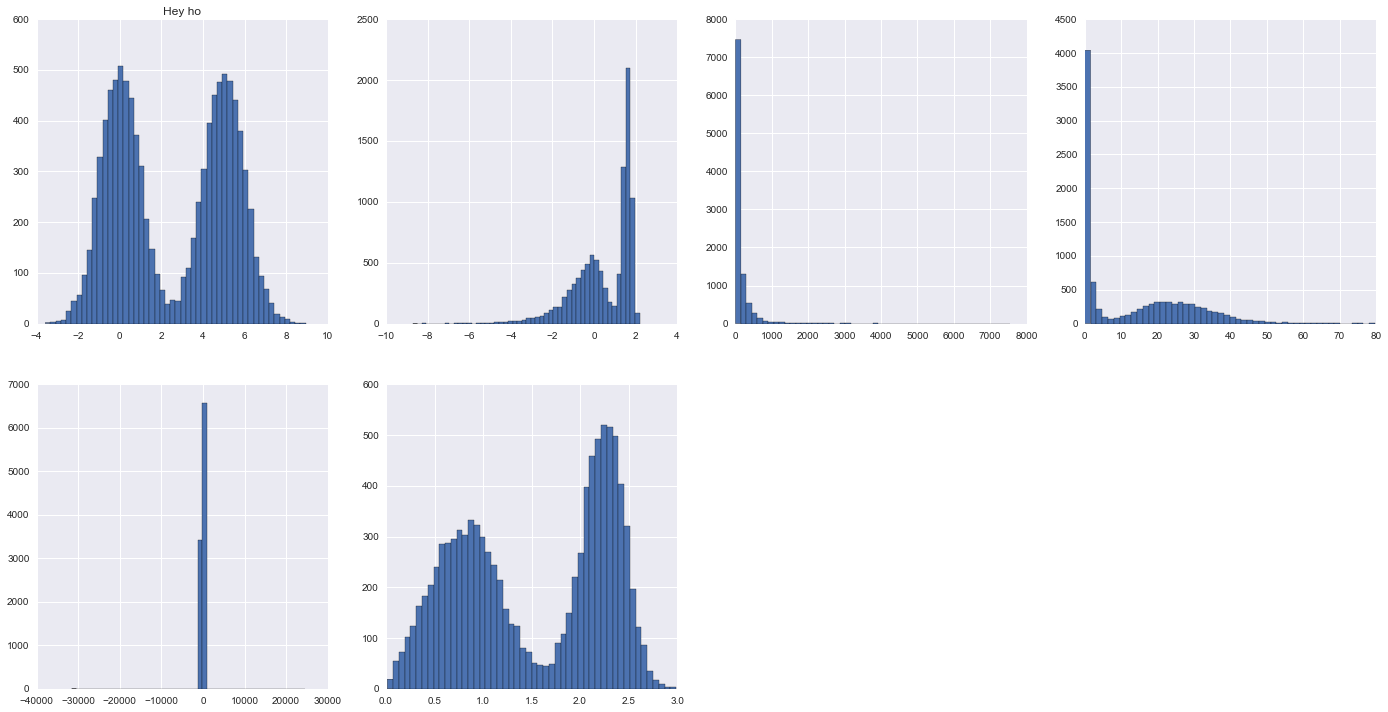

Printing 5 charts
241


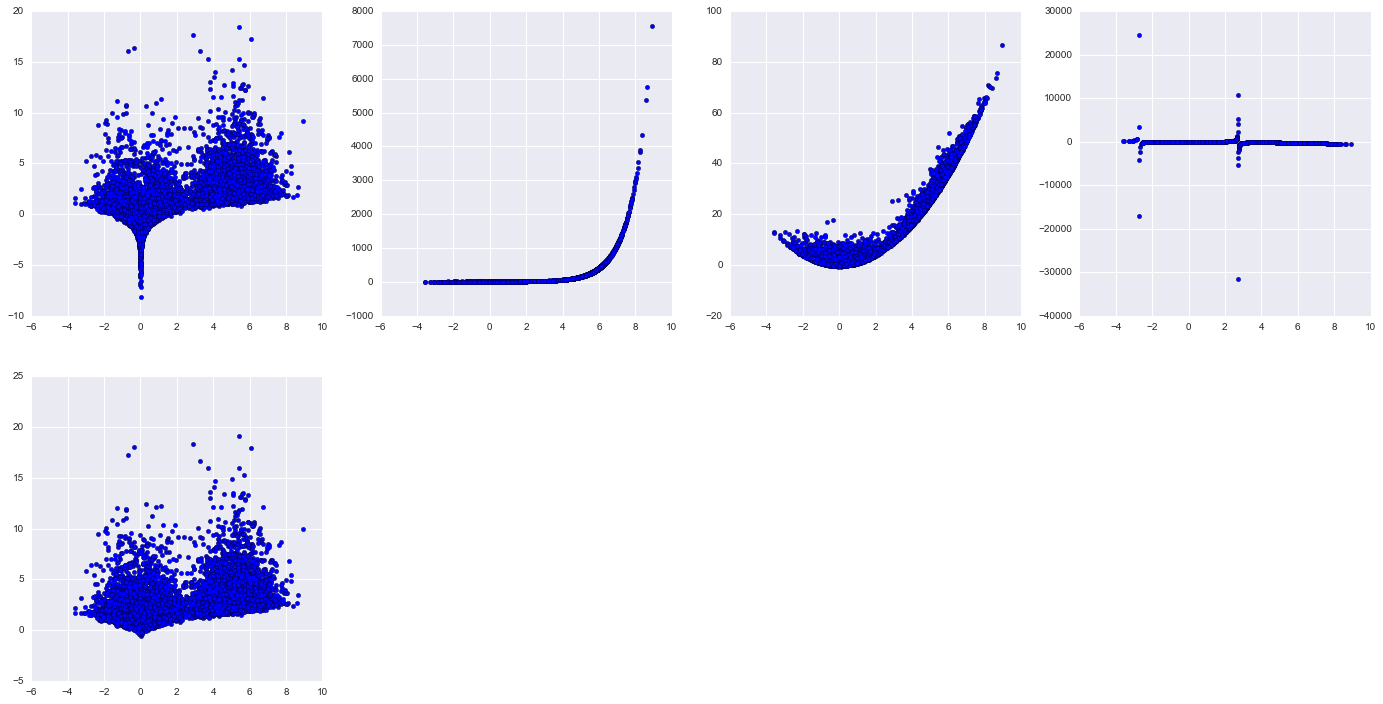

Printing 5 charts
241


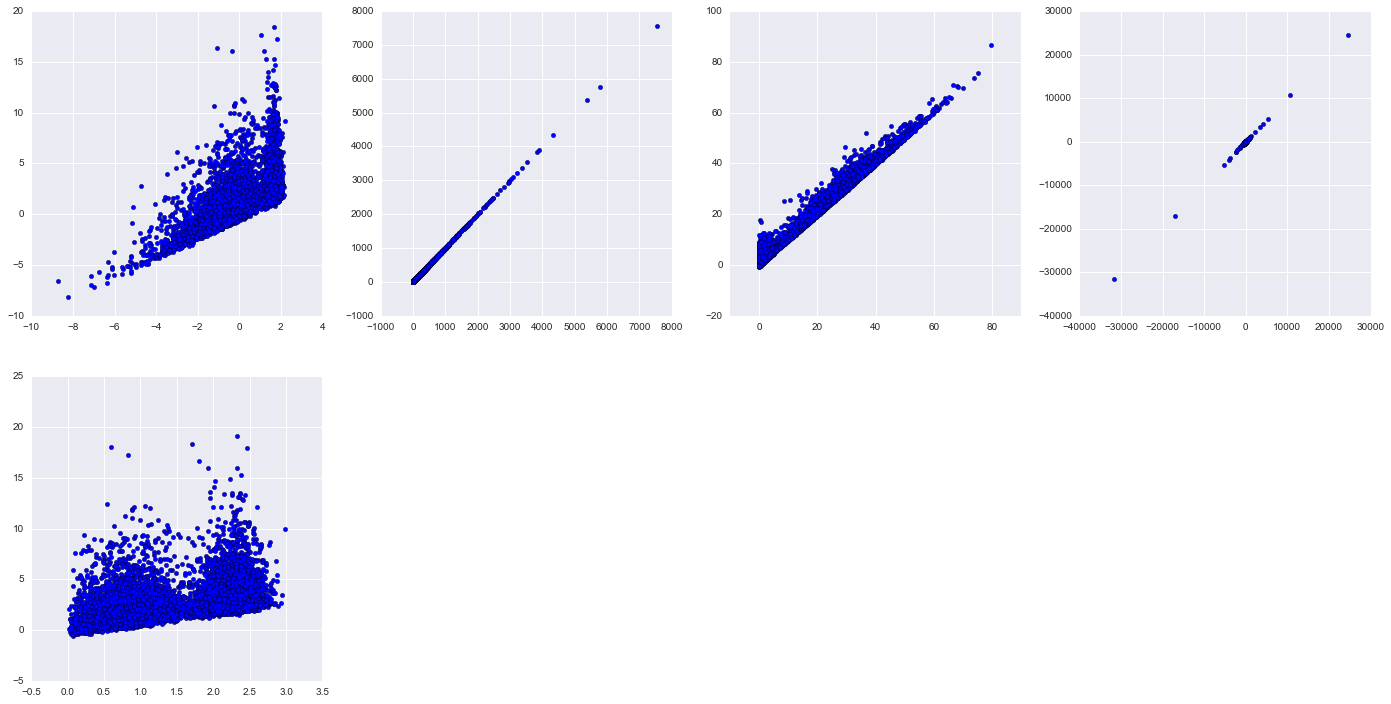

In [336]:
from scipy import stats
import statsmodels.api as sm

e = np.random.normal(0, .1, size)
x0 = np.append(np.random.normal(0, 1, size/2), np.random.normal(5, 1, size/2))
x1 = np.log(np.abs(x0))
x2 = np.exp(x0)
x3 = x0**2
x4 = x0**3/(1 - np.log(np.abs(x0)))
x5 = np.sqrt(np.abs(x0))

y1 = x1 + X1**2 + X2 + e
y2 = x2 + X1**2 + X2 + e
y3 = x3 + X1**2 + X2 + e
y4 = x4 + X1**2 + X2 + e
y5 = x5 + X1**2 + X2 + e

p.hist(x0, bins=50).title("Hey ho")
p.hist(x1, bins=50)
p.hist(x2, bins=50)
p.hist(x3, bins=50)
p.hist(x4, bins=50)
p.hist(x5, bins=50)
p.show()

p.scatter(x0, y1)
p.scatter(x0, y2)
p.scatter(x0, y3)
p.scatter(x0, y4)
p.scatter(x0, y5)
p.show()

p.scatter(x1, y1)
p.scatter(x2, y2)
p.scatter(x3, y3)
p.scatter(x4, y4)
p.scatter(x5, y5)
p.show()


In [ ]:

def reg(name, x,y):
    model = sm.OLS(y, x)
    results = model.fit()
    print name, "==============================\n", results.summary()

reg("x0 : y1", x0, y1)
reg("x1 : y1", x1, y1)
reg("x0 : y2", x0, y2)
reg("x2 : y2", x2, y2)
reg("x0 : y3", x0, y3)
reg("x3 : y3", x3, y3)
reg("x0 : y4", x0, y4)
reg("x4 : y4", x4, y4)
reg("x0 : y5", x0, y5)
reg("x5 : y5", x5, y5)

In [337]:
import inspect

class PyPlotWrapper:
    calls   = []

    PLOTS   = [ 'scatter', 'plot', 'hist' ]
    METHODS = [ 'title' ]

    MAX_COLUMNS = 4
    COLUMN_INCH = 6
    
    def __init__(self):
        for m in np.append(self.METHODS, self.PLOTS):
            self.mirror_method(m)

    def mirror_method(self, method):
        def schedule_plot(*args, **kwargs):
            self.calls += [ { 'method': method, 'args': args, 'kwargs': kwargs } ]
            return self
        setattr(self, method, schedule_plot)
    
    def prepare(self, mask):
        plots = [ c for c in self.calls if c['method'] in self.PLOTS]
        n_plt = len(plots)
        
        mask = mask or (1 + n_plt/self.MAX_COLUMNS)*10 + ( self.MAX_COLUMNS if n_plt > self.MAX_COLUMNS else n_plt)
        size = ( self.COLUMN_INCH*(mask%10), self.COLUMN_INCH*int(mask / 10) )

        print "Printing %d charts" % (len(plots))
        plt.figure(figsize=size)
        return mask*10 + 1
    
    def render(self, call, subplot):
        if call['method'] in self.PLOTS:
            plt.subplot(subplot)
            subplot += 1
        func = getattr(plt, call['method'])
        func(*call['args'], **call['kwargs'])
        return subplot
    
    def show(self, schema=None):
        try:
            subplot = self.prepare(schema)
            for p in range(len(self.calls)):
                subplot = self.render(self.calls[p], subplot)
        finally:
            plt.show()
            self.calls = []

p = PyPlotWrapper()
